<a href="https://colab.research.google.com/github/eulerianKnight/learning_pytorch_lightning/blob/main/introduction_to_lightning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to PyTorch Lightning.

## PyTorch

PyTorch is an open-source machine learning library developed by the Facebook AI Research lab (FAIR). It's widely used for various applications in artificial intelligence, such as natural language processing, computer vision, and deep learning. Key features of PyTorch include:

1. **Tensors and Dynamic Computation Graphs**: At its core, PyTorch provides a multi-dimensional array, known as a tensor, which is similar to NumPy arrays but with added support for GPU acceleration. It also employs dynamic computation graphs (or autograd system), which means the graph is built on-the-fly as operations are performed, making it more flexible for designing complex architectures.

2. **Neural Network Module**: PyTorch includes the `torch.nn` module that provides the building blocks for creating neural networks. It offers a simple way to construct layers, activations, and loss functions.

3. **GPU Acceleration**: PyTorch seamlessly integrates with CUDA, NVIDIA's parallel computing platform and API model, enabling it to efficiently compute operations on GPUs, significantly speeding up training times for deep learning models.

4. **Easy Integration with Python**: PyTorch is designed to be deeply integrated with Python, making it more intuitive and pythonic to use. This integration makes it easier for developers who are already familiar with Python programming.

5. **Eager Execution**: Unlike some other machine learning frameworks that use static graphs, PyTorch's dynamic (or "eager") execution environment allows developers to see their code execution step-by-step. This feature greatly helps in debugging and understanding complex models.

6. **Strong Community and Industry Support**: PyTorch has gained immense popularity and has a strong community, including both academic researchers and industry professionals. This results in a wealth of tutorials, open-source projects, and forums for support.

7. **Extensibility and Experimentation**: It is designed for flexibility and allows researchers to experiment with novel architectures and ideas with relative ease.

PyTorch is particularly favored in the research community for its flexibility and ease of use, making it a go-to tool for experimenting with new ideas in the field of machine learning and artificial intelligence.

## PyTorch Lightning

PyTorch Lightning is a lightweight wrapper and a refactoring of the popular machine learning library PyTorch. It was designed to help researchers and developers to work more efficiently while still using the powerful capabilities of PyTorch. Key features and advantages of PyTorch Lightning include:

1. **Simplified Code**: PyTorch Lightning simplifies the boilerplate code typically needed in PyTorch. It abstracts a lot of the details involved in writing a full PyTorch implementation, making the codebase cleaner, more readable, and easier to maintain.

2. **Scalability**: It makes scaling models across multiple GPUs, TPUs, and even CPUs much easier. With PyTorch Lightning, it’s more straightforward to move your models from a research environment to a production environment.

3. **Reproducibility**: It helps in making experiments more reproducible. By organizing and standardizing the way PyTorch code is written, PyTorch Lightning makes it easier to share and reproduce models and results.

4. **Focus on Research**: By reducing engineering boilerplate, researchers and developers can focus more on the research side of deep learning and less on the engineering side.

5. **Built-in Best Practices**: PyTorch Lightning incorporates best practices for training models, which helps in avoiding common mistakes.

6. **Plug-and-Play Modules**: It comes with built-in modules for logging, checkpointing, and other common tasks in machine learning workflows.

7. **Compatibility with PyTorch Ecosystem**: PyTorch Lightning is fully compatible with the PyTorch ecosystem, meaning you can use all of PyTorch’s libraries and modules with it.

8. **Community and Support**: Like PyTorch, PyTorch Lightning has a growing community and is increasingly being adopted in both academia and industry, leading to a wealth of tutorials, extensions, and support forums.

PyTorch Lightning is particularly popular among researchers and practitioners who want to streamline their deep learning code and make it more efficient and readable without losing the flexibility and power of PyTorch.

## What this notebook covers:

- Multi-Layer Perceptron Training in PyTorch.
- Multi-Layer Perceptron Training in PyTorch Lightning.
- Usage of TorchMetrics.


## Download and Import Packages

In [1]:
!pip install lightning torchmetrics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 27.4 MB/s eta 0:00:00


In [2]:
from collections import Counter
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split
from torchvision import transforms, utils, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import lightning as L
from lightning.pytorch.loggers import CSVLogger

import torchmetrics

from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [3]:
RANDOM_SEED = 31415926

## Download MNIST Dataset

In [4]:
train_dataset = datasets.MNIST(root='./mnist', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist', train=False, transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 206430446.64it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 82799517.31it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 39758612.66it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18282657.17it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [5]:
# Split dataset
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [55000, 5000])

In [6]:
# Create DataLoaders
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)
val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=64,
    shuffle=False,
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False,
)

In [7]:
train_counter = Counter()
val_counter = Counter()
test_counter = Counter()

for images, labels in train_loader:
    train_counter.update(labels.numpy())
print(f"Training Label Distribution: {sorted(train_counter.items())}")

for images, labels in val_loader:
    val_counter.update(labels.numpy())
print(f"Validation Label Distribution: {sorted(val_counter.items())}")

for images, labels in test_loader:
    test_counter.update(labels.numpy())
print(f"Test Label DIstribution: {sorted(test_counter.items())}")

Training Label Distribution: [(0, 5450), (1, 6179), (2, 5462), (3, 5623), (4, 5342), (5, 4929), (6, 5400), (7, 5768), (8, 5364), (9, 5483)]
Validation Label Distribution: [(0, 473), (1, 563), (2, 496), (3, 508), (4, 500), (5, 492), (6, 518), (7, 497), (8, 487), (9, 466)]
Test Label DIstribution: [(0, 980), (1, 1135), (2, 1032), (3, 1010), (4, 982), (5, 892), (6, 958), (7, 1028), (8, 974), (9, 1009)]


## Majority Rule Classifier

- It is a Dummy Classifier which will always return the most frequent class label.

In [8]:
majority_class = test_counter.most_common(1)[0]
print("Majority class:", majority_class[0])

baseline_acc = majority_class[1] / sum(test_counter.values())
print("Accuracy when always predicting the majority class:")
print(f"{baseline_acc:.2f} ({baseline_acc*100:.2f}%)")

Majority class: 1
Accuracy when always predicting the majority class:
0.11 (11.35%)


### Visual Check

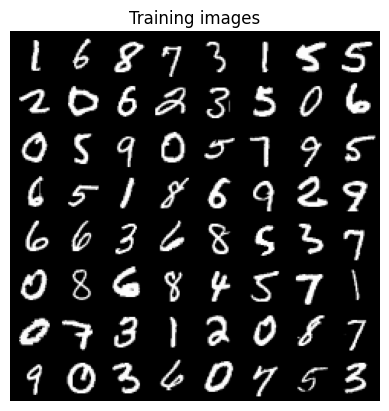

In [9]:
for images, labels in train_loader:
    break

fig = plt.figure()
plt.axis('off')
plt.title("Training images")
plt.imshow(np.transpose(utils.make_grid(images[:64], padding=2, normalize=True).cpu(), (1, 2, 0)))

## Modeling Using PyTorch

- Step 1: Create function to return data loaders

In [10]:
def get_dataloader(batch_size=64):
    train_dataset = datasets.MNIST(
        root='./mnist',
        train=True,
        transform=transforms.ToTensor(),
        download=True)
    test_dataset = datasets.MNIST(
        root='./mnist',
        train=False,
        transform=transforms.ToTensor())

    train_dataset, val_dataset = random_split(train_dataset, [55000, 5000])

    train_loder = DataLoader(
        dataset=train_dataset,
        num_workers=os.cpu_count(),
        batch_size=batch_size,
        shuffle=True
    )
    val_loader = DataLoader(
        dataset=val_dataset,
        num_workers=os.cpu_count(),
        batch_size=batch_size,
        shuffle=False
    )
    test_loader = DataLoader(
        dataset=test_dataset,
        num_workers=os.cpu_count(),
        batch_size=batch_size,
        shuffle=False
    )
    return train_loder, val_loader, test_loader

### Compute Accuracy Utility function

In [11]:
def compute_accuracy(model, dataloader, device=None):

    if device is None:
        device = torch.device("cpu")
    model = model.eval()

    correct = 0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):

        features, labels = features.to(device), labels.to(device)

        with torch.no_grad():
            logits = model(features)

        predictions = torch.argmax(logits, dim=1)

        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return correct / total_examples

In [12]:
# Compute Loss function
def compute_total_loss(model, dataloader, device=None):
    if device is None:
        device = torch.device('cpu')

    model = model.eval()
    loss = 0.0
    examples = 0.0

    for idx, (features, labels) in enumerate(dataloader):
        features, labels = features.to(device), labels.to(device)

        with torch.no_grad():
            logits = model(features)
            batch_loss = F.cross_entropy(logits, labels)

        loss += batch_loss.item()
        examples += len(features)

    return loss / examples

### Create Multi-Layer Perceptron Model in PyTorch

In [13]:
# Write a training loop to train a PyTorch Model
def train(
        model,
        optimizer,
        train_loader,
        val_loader,
        num_epochs=10,
        seed=RANDOM_SEED,
        device=None):
    if device is None:
        device = torch.device(device)

    torch.manual_seed(seed)

    for epoch in range(num_epochs):
        model.train()
        for batch_idx, (features, labels) in enumerate(train_loader):
            features, labels = features.to(device), labels.to(device)

            logits = model(features)

            loss = F.cross_entropy(logits, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if not batch_idx % 250:
                val_loss = compute_total_loss(model, val_loader, device=device)
                print(
                    f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
                    f" | Batch: {batch_idx:04d} | Train Loss: {loss:.4f}"
                    f" | Train Batch Loss: {loss:.4f}"
                    f" | Val Loss: {val_loss:.4f}"
                )

In [14]:
class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()

        self.all_layers = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Linear(num_features, 64),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(32, num_classes),
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        logits = self.all_layers(x)
        return logits

In [15]:
# Running the Scripts
print(f"Torch CUDA available? {torch.cuda.is_available()}")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loader, val_loader, test_loader = get_dataloader()

model = PyTorchMLP(num_features=784, num_classes=10)
model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

train(
    model,
    optimizer,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    device=device
)

train_acc = compute_accuracy(model, train_loader, device=device)
val_acc = compute_accuracy(model, val_loader, device=device)
test_acc = compute_accuracy(model, test_loader, device=device)

print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")

Torch CUDA available? True
Epoch: 001/010 | Batch: 0000 | Train Loss: 2.3307 | Train Batch Loss: 2.3307 | Val Loss: 0.0365
Epoch: 001/010 | Batch: 0250 | Train Loss: 0.5370 | Train Batch Loss: 0.5370 | Val Loss: 0.0102
Epoch: 001/010 | Batch: 0500 | Train Loss: 0.8742 | Train Batch Loss: 0.8742 | Val Loss: 0.0067
Epoch: 001/010 | Batch: 0750 | Train Loss: 0.4224 | Train Batch Loss: 0.4224 | Val Loss: 0.0057
Epoch: 002/010 | Batch: 0000 | Train Loss: 0.2159 | Train Batch Loss: 0.2159 | Val Loss: 0.0055
Epoch: 002/010 | Batch: 0250 | Train Loss: 0.2687 | Train Batch Loss: 0.2687 | Val Loss: 0.0052
Epoch: 002/010 | Batch: 0500 | Train Loss: 0.3970 | Train Batch Loss: 0.3970 | Val Loss: 0.0048
Epoch: 002/010 | Batch: 0750 | Train Loss: 0.4847 | Train Batch Loss: 0.4847 | Val Loss: 0.0045
Epoch: 003/010 | Batch: 0000 | Train Loss: 0.1543 | Train Batch Loss: 0.1543 | Val Loss: 0.0044
Epoch: 003/010 | Batch: 0250 | Train Loss: 0.1547 | Train Batch Loss: 0.1547 | Val Loss: 0.0043
Epoch: 003/01

## Create Multi-Perceptron in PyTorch Lightning.

In [16]:
class LightningModel(L.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()

        self.learning_rate = learning_rate
        self.model = model

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        features, true_labels = batch
        logits = self(features)
        loss = F.cross_entropy(logits, true_labels)
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        features, true_labels = batch
        logits = self(features)
        loss = F.cross_entropy(logits, true_labels)
        self.log("val_loss", loss, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate)
        return optimizer

In [17]:
# Create instances of PyTorch model and Lightning Module
pytorch_model = PyTorchMLP(num_features=784, num_classes=10)
lightning_model = LightningModel(model=pytorch_model, learning_rate=0.05)

In [18]:
# Create an instance of Trainer class
trainer = L.Trainer(
    max_epochs=10,
    accelerator='auto',
    devices='auto'
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [19]:
# Fit the model
trainer.fit(
    model=lightning_model,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader
)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name  | Type       | Params
-------------------------------------
0 | model | PyTorchMLP | 52.6 K
-------------------------------------
52.6 K    Trainable params
0         Non-trainable params
52.6 K    Total params
0.211     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type       | Params
-------------------------------------
0 | model | PyTorchMLP | 52.6 K
-------------------------------------
52.6 K    Trainable params
0         Non-trainable params
52.6 K    Total params
0.211     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [20]:
train_acc = compute_accuracy(lightning_model, train_loader)
val_acc = compute_accuracy(lightning_model, val_loader)
test_acc = compute_accuracy(lightning_model, test_loader)
print(f"Train accuracy: {train_acc*100:.2f}%")
print(f"Validation accuracy: {val_acc*100:.2f}%")
print(f"Test accuracy: {test_acc*100:.2f}%")

Train accuracy: 97.81%
Validation accuracy: 96.86%
Test accuracy: 96.85%


## Using TorchMetrics

- Metrics are computed incrementally due to memory limitations. It helps with larger dataset.
- Torchmetrics helps with this process.
- Utilising TorchMetrics for computing Accuracy.
- Documentation: https://lightning.ai/docs/torchmetrics/stable/

In [21]:
class LightningModel(L.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()

        self.learning_rate = learning_rate
        self.model = model
        # Utilise torchmetrics to instantiate Accuracy object
        self.train_acc = torchmetrics.Accuracy(task='multiclass', num_classes=10)
        self.val_acc = torchmetrics.Accuracy(task='multiclass', num_classes=10)

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        features, true_labels = batch
        logits = self(features)
        loss = F.cross_entropy(logits, true_labels)
        self.log("train_loss", loss)
        predicted_labels = torch.argmax(logits, dim=1)
        self.train_acc(predicted_labels, true_labels)
        self.log(
            "train_acc",
            self.train_acc,
            prog_bar=True,
            on_step=False,
            on_epoch=True
        )
        return loss

    def validation_step(self, batch, batch_idx):
        features, true_labels = batch
        logits = self(features)
        loss = F.cross_entropy(logits, true_labels)
        self.log("val_loss", loss, prog_bar=True)
        predicted_labels = torch.argmax(logits, dim=1)
        self.val_acc(predicted_labels, true_labels)
        self.log("val_acc", self.val_acc, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate)
        return optimizer

In [22]:
# Create instances of PyTorch model and Lightning Module
pytorch_model = PyTorchMLP(num_features=784, num_classes=10)
lightning_model = LightningModel(model=pytorch_model, learning_rate=0.05)

In [23]:
trainer = L.Trainer(
    max_epochs=10,
    accelerator='auto',
    devices='auto'
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [24]:
trainer.fit(
    model=lightning_model,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader
)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 52.6 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
-------------------------------------------------
52.6 K    Trainable params
0         Non-trainable params
52.6 K    Total params
0.211     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 52.6 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
-------------------------------------------------
52.6 K    Trainable params
0         Non-trainable params
52.6 K    Total params
0.211     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


### Evaluating model on test set

- Lightning wont display Test Accuracy in progress bar as Test Accuracy is not calculated during training.
- We need to call it separately after training.

In [25]:
class LightningModel(L.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()

        self.learning_rate = learning_rate
        self.model = model

        self.save_hyperparameters(ignore=['model'])
        # Instantiate torchmetrics object for test accuracy
        self.train_acc = torchmetrics.Accuracy(task='multiclass', num_classes=10)
        self.val_acc = torchmetrics.Accuracy(task='multiclass', num_classes=10)
        self.test_acc = torchmetrics.Accuracy(task='multiclass', num_classes=10)

    def forward(self, x):
        return self.model(x)

    def _shared_step(self, batch):
        features, true_labels = batch
        logits = self(features)
        loss = F.cross_entropy(logits, true_labels)
        predicted_labels = torch.argmax(logits, dim=1)
        return loss, true_labels, predicted_labels

    def training_step(self, batch, batch_idx):
        loss, true_labels, predicted_labels = self._shared_step(batch)
        self.log("train_loss", loss)
        self.train_acc(predicted_labels, true_labels)
        self.log(
            "train_acc", self.train_acc, prog_bar=True, on_step=False, on_epoch=True
        )
        return loss

    def validation_step(self, batch, batch_idx):
        loss, true_labels, predicted_labels = self._shared_step(batch)
        self.log("val_loss", loss, prog_bar=True)
        self.val_acc(predicted_labels, true_labels)
        self.log("val_acc", self.val_acc, prog_bar=True)

    def test_step(self, batch, batch_idx):
        loss, true_labels, predicted_labels = self._shared_step(batch)
        self.test_acc(predicted_labels, true_labels)
        self.log("accuracy", self.test_acc)

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate)
        return optimizer

In [26]:
# Create instances of PyTorch model and Lightning Module
pytorch_model = PyTorchMLP(num_features=784, num_classes=10)
lightning_model = LightningModel(model=pytorch_model, learning_rate=0.05)

In [27]:
trainer = L.Trainer(
    max_epochs=10,
    accelerator='auto',
    devices='auto'
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [28]:
trainer.fit(
    model=lightning_model,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader
)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 52.6 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
52.6 K    Trainable params
0         Non-trainable params
52.6 K    Total params
0.211     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 52.6 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
52.6 K    Trainable params
0         Non-tra

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [29]:
train_acc = trainer.test(dataloaders=train_loader)[0]['accuracy']
val_acc = trainer.test(dataloaders=val_loader)[0]['accuracy']
test_acc = trainer.test(dataloaders=test_loader)[0]['accuracy']

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at /content/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at /content/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at /conten

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.9805272817611694     │
└───────────────────────────┴───────────────────────────┘

INFO: Restoring states from the checkpoint path at /content/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at /content/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at /content/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │     0.968999981880188     │
└───────────────────────────┴───────────────────────────┘

INFO: Restoring states from the checkpoint path at /content/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at /content/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at /content/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.9700000286102295     │
└───────────────────────────┴───────────────────────────┘

In [30]:
print(
    f"Train Accuracy: {train_acc*100:.2f}\n",
    f"Validation Accuracy: {val_acc*100:.2f}\n",
    f"Test Accuracy: {test_acc*100:.2f}\n",
)

Train Accuracy: 98.05
 Validation Accuracy: 96.90
 Test Accuracy: 97.00



## Source of Randomness

- There are multiple sources of randomness while training neural network.
    - Model Weight Initialization.
    - Dataset shuffling and augmentation.
    - Nondeterministic algorithms.
    - (GPU) Hardware and drivers.

### Model Weight Initialization

In [31]:
# Check Weight vectors for a single layer
linear = torch.nn.Linear(in_features=5, out_features=10)
linear.weight[0]

tensor([-0.1913, -0.3719,  0.0944,  0.4285,  0.3639],
       grad_fn=<SelectBackward0>)

In [32]:
# Check Weight vectors for another single layer will output different weights
linear = torch.nn.Linear(in_features=5, out_features=10)
linear.weight[0]

tensor([-0.0723, -0.2478,  0.0706,  0.0458, -0.2418],
       grad_fn=<SelectBackward0>)

In [33]:
# Set seed
torch.manual_seed(31415926)
# Check Weight vectors for a single layer
linear = torch.nn.Linear(in_features=5, out_features=10)
linear.weight[0]

tensor([-0.0166,  0.0202,  0.4373, -0.0404,  0.0005],
       grad_fn=<SelectBackward0>)

In [34]:
# Set seed and Check Weight vectors for a single layer, it will be same as last
torch.manual_seed(31415926)
linear = torch.nn.Linear(in_features=5, out_features=10)
linear.weight[0]

tensor([-0.0166,  0.0202,  0.4373, -0.0404,  0.0005],
       grad_fn=<SelectBackward0>)

### Dataset Shuffling and Augmentation

In [35]:
train_dataset = datasets.MNIST(
    root='./mnist', train=True, download=True, transform=transforms.ToTensor()
)
train_loader = DataLoader(
    train_dataset,
    batch_size=10,
    shuffle=True)
for images, labels in train_loader:
    pass
print(f"Labels of last batch: {labels}")

for images, labels in train_loader:
    pass
print(f"Labels of last batch: {labels}")

Labels of last batch: tensor([9, 0, 3, 2, 4, 2, 9, 4, 8, 8])
Labels of last batch: tensor([4, 7, 1, 5, 8, 9, 3, 9, 6, 1])


In [36]:
torch.manual_seed(31415926)
for images, labels in train_loader:
    pass
print(f"Labels of last batch: {labels}")

Labels of last batch: tensor([9, 0, 6, 5, 0, 6, 2, 5, 2, 7])


In [37]:
torch.manual_seed(31415926)
for images, labels in train_loader:
    pass
print(f"Labels of last batch: {labels}")

Labels of last batch: tensor([9, 0, 6, 5, 0, 6, 2, 5, 2, 7])


### Nondeterministic Algorithms

- Using 'deterministic' parameter in 'lightning.Trainer'. This works for most of algorithms NOT ALL.
```
trainer = L.Trainer(
    max_epochs=2,
    accelerator="auto",
    devices="auto",
    deterministic=True
)
```

## Data Module

- Documentation: https://lightning.ai/docs/pytorch/stable/data/datamodule.html
- A DataModule is a shareable, reusable class that encapsulatesdata processing and data loading logic.
- It encapsulates the five steps involved in data processing in PyTorch:
    - Download / tokenize / process.
    - Clean and (maybe) save to disk.
    - Load inside Dataset.
    - Apply transforms (rotate, tokenize, etc…).
    - Wrap inside a DataLoader.
- Methods in a DataModule Class:
    - `prepare_data()`: Contains the logic for loading our dataset. It avoids duplication in multi-GPU training settings.
    - `setup()`: Contains code that can be executed multiple times. For eg, if we have multiple GPUs, each GPU needs to execute this code so thatthe dataset becomes available in that GPU memory.
    - `train_dataloader()`: Training DataLoader
    - `val_dataloader()`: Validation DataLoader
    - `test_dataloader()`: Test DataLoader
    - `predict_dataloader()`: DataLoader for new data predictions.


- Note:
    - `prepare_data()` method is only executed once, while the `setup()` method is executed on each GPU separately if we have a multi-GPU training setup.
    - If model training happens only on a single GPU or it happens on the CPU, we technically don't need to have separate `prepare_data()` and `setup()` method. We can have all the code in either of the two.
    - When `trainer.fit()` will be called,it will use the training loader and the validation loader during fitting procedure.
    - For evaluation, we can call `trainer.test()` which will call the `test_dataloader()`.
    - For prediction, we need to call `trainer.predict()` which will use new data in `predict_dataloader()` method.

In [38]:
class MNISTDataModule(L.LightningDataModule):
    def __init__(self, data_dir='./mnist', batch_size=64):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size

    def prepare_data(self):
        # Download dataset
        datasets.MNIST(self.data_dir, train=True, download=True)
        datasets.MNIST(self.data_dir, train=False, download=True)

    def setup(self, stage:str):
        self.mnist_test = datasets.MNIST(
            self.data_dir, train=False, transform=transforms.ToTensor()
        )
        self.mnist_predict = datasets.MNIST(
            self.data_dir, train=False, transform=transforms.ToTensor()
        )
        mnist_full = datasets.MNIST(
            self.data_dir, transform=transforms.ToTensor(), train=True
        )
        self.mnist_train, self.mnist_val = random_split(mnist_full, [55000, 5000])

    def train_dataloader(self):
        return DataLoader(self.mnist_train, batch_size=self.batch_size, shuffle=True, drop_last=True)

    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=self.batch_size, shuffle=False)

    def test_dataloader(self):
        return DataLoader(self.mnist_test, batch_size=self.batch_size, shuffle=False)

    def predict_dataloader(self):
        return DataLoader(self.mnist_predict, batch_size=self.batch_size, shuffle=False)

dm = MNISTDataModule()

In [39]:
# Create instances of PyTorch model and Lightning Module
pytorch_model = PyTorchMLP(num_features=784, num_classes=10)
lightning_model = LightningModel(model=pytorch_model, learning_rate=0.05)

In [41]:
trainer = L.Trainer(
    max_epochs=10,
    accelerator='auto',
    devices='auto'
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [42]:
trainer.fit(model=lightning_model, datamodule=dm)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 52.6 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
52.6 K    Trainable params
0         Non-trainable params
52.6 K    Total params
0.211     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 52.6 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
52.6 K    Trainable params
0         Non-tra

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
# Print accuracies
train_acc = trainer.validate(dataloaders=dm.train_dataloader())[0]['val_acc']
val_acc = trainer.validate(dataloaders=dm.val_dataloader())[0]['val_acc']
test_acc = trainer.test(dataloaders=dm.test_dataloader())[0]['accuracy']
print(
    f"Train Accuracy: {train_acc*100:.2f}\n",
    f"Validation Accuracy: {val_acc*100:.2f}\n",
    f"Test Accuracy: {test_acc*100:.2f}",
)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.validate(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.validate(ckpt_path='best')` to use the best model or `.validate(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at /content/lightning_logs/version_6/checkpoints/epoch=9-step=8590.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/lightning_logs/version_6/checkpoints/epoch=9-step=8590.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at /content/lightning_logs/version_6/checkpoints/epoch=9-step=8590.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoin

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │     0.978663444519043     │
│         val_loss          │    0.07288423180580139    │
└───────────────────────────┴───────────────────────────┘

INFO: Restoring states from the checkpoint path at /content/lightning_logs/version_6/checkpoints/epoch=9-step=8590.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/lightning_logs/version_6/checkpoints/epoch=9-step=8590.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at /content/lightning_logs/version_6/checkpoints/epoch=9-step=8590.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at /content/lightning_logs/version_6/checkpoints/epoch=9-step=8590.ckpt


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │     0.978600025177002     │
│         val_loss          │    0.07127714157104492    │
└───────────────────────────┴───────────────────────────┘

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at /content/lightning_logs/version_6/checkpoints/epoch=9-step=8590.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/lightning_logs/version_6/checkpoints/epoch=9-step=8590.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at /content/lightning_logs/version_6/checkpoints/epoch=9-step=8590.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at /conten

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.9697999954223633     │
└───────────────────────────┴───────────────────────────┘

Train Accuracy 97.87 Validation Accuracy 97.86 Test Accuracy 96.98 


## Logging

- Logging helps us in following way.
    - Inspect and visualize Loss/Loss curve.
    - Inspect and visualize Overfitting.
    - Saving Hyperparameters.
- Different Loggers available in Lightning.
    - `CometLogger`
    - `CSVLogger`
    - `MLFlowLogger`
    - `NeptuneLogger`
    - `TensorBoardLogger`
    - `WandbLogger`
- Read Here: https://lightning.ai/docs/pytorch/stable/extensions/logging.html



#### CSV Logger

In [ ]:
# Create instance of PyTorchMLP, LightningModel
pytorch_model = PyTorchMLP(num_features=784, num_classes=10)
lightning_model = LightningModel(model=pytorch_model, learning_rate=0.05)

# Create trainer instance including CSVLogger
trainer = L.Trainer(
    max_epochs=10,
    accelerator="auto",
    devices="auto",
    deterministic=True,
    logger=CSVLogger(save_dir='./logs/')
)

# Fit model
trainer.fit(model=lightning_model, datamodule=dm)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 52.6 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
52.6 K    Trainable params
0         Non-t

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


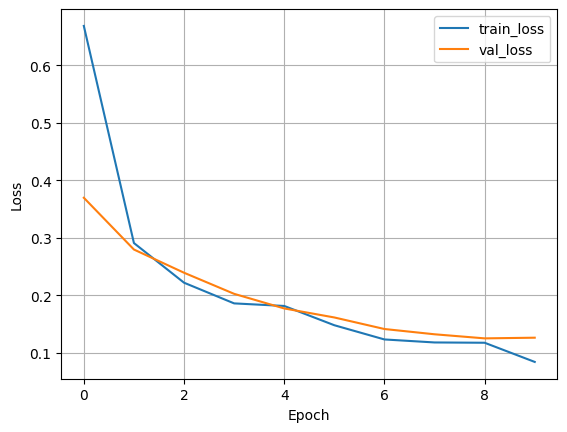

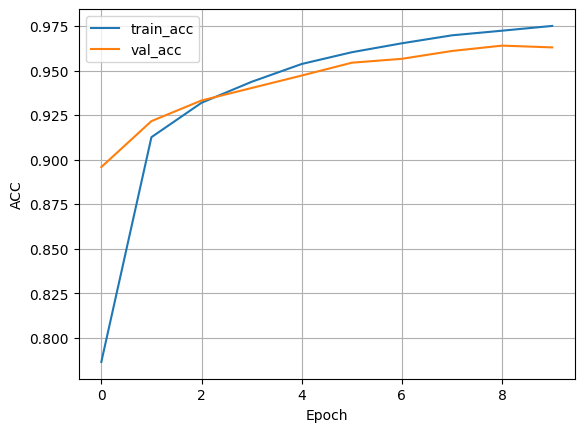

In [ ]:
# Plot metrics
metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")

aggreg_metrics = []
agg_col = "epoch"
for i, dfg in metrics.groupby(agg_col):
    agg = dict(dfg.mean())
    agg[agg_col] = i
    aggreg_metrics.append(agg)

df_metrics = pd.DataFrame(aggreg_metrics)
df_metrics[["train_loss", "val_loss"]].plot(
    grid=True,
    legend=True,
    xlabel="Epoch",
    ylabel="Loss"
)
df_metrics[["train_acc", "val_acc"]].plot(
    grid=True,
    legend=True,
    xlabel="Epoch",
    ylabel="ACC"
)
plt.show()

## Evaluating and Using Models on New data.

In [ ]:
# Save a checkpoint file
trainer.save_checkpoint("./checkpoints/mnist_checkpoint.ckpt")

In [ ]:
# Load the saved model
lightning_model_loaded = LightningModel.load_from_checkpoint(
    checkpoint_path='/content/checkpoints/mnist_checkpoint.ckpt',
    model=pytorch_model
)

In [ ]:
dm = MNISTDataModule()
dm.setup(stage='test')

In [ ]:
# Predict on new data
test_dataloader = dm.test_dataloader()
acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)

for batch in test_dataloader:
    features, true_labels = batch

    with torch.inference_mode():
        logits = lightning_model_loaded(features)

    predicted_labels = torch.argmax(logits, dim=1)
    acc(predicted_labels, true_labels)

predicted_labels[:5]

tensor([1, 2, 3, 4, 5])

In [ ]:
test_acc = acc.compute()
print(f"Test Accuracy {test_acc*100:.2f}")

Test Accuracy 96.46


In [ ]:
# Inspecting Failure Cases
# Define class mapping
class_dict = {0: 'digit 0',
              1: 'digit 1',
              2: 'digit 2',
              3: 'digit 3',
              4: 'digit 4',
              5: 'digit 5',
              6: 'digit 6',
              7: 'digit 7',
              8: 'digit 8',
              9: 'digit 9'}

In [ ]:
# Utility function for show failures
def show_failures(
    model,
    data_loader,
    unnormalizer=None,
    class_dict=None,
    nrows=3,
    ncols=5,
    figsize=None,
):

    failure_features = []
    failure_pred_labels = []
    failure_true_labels = []

    for batch_idx, (features, targets) in enumerate(data_loader):

        with torch.inference_mode():
            features = features
            targets = targets
            logits = model(features)
            predictions = torch.argmax(logits, dim=1)

        for i in range(features.shape[0]):
            if targets[i] != predictions[i]:
                failure_features.append(features[i])
                failure_pred_labels.append(predictions[i])
                failure_true_labels.append(targets[i])

        if len(failure_true_labels) >= nrows * ncols:
            break

    features = torch.stack(failure_features, dim=0)
    targets = torch.tensor(failure_true_labels)
    predictions = torch.tensor(failure_pred_labels)

    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=figsize
    )

    if unnormalizer is not None:
        for idx in range(features.shape[0]):
            features[idx] = unnormalizer(features[idx])
    nhwc_img = np.transpose(features, axes=(0, 2, 3, 1))

    if nhwc_img.shape[-1] == 1:
        nhw_img = np.squeeze(nhwc_img.numpy(), axis=3)

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(nhw_img[idx], cmap="binary")
            if class_dict is not None:
                ax.title.set_text(
                    f"P: {class_dict[predictions[idx].item()]}"
                    f"\nT: {class_dict[targets[idx].item()]}"
                )
            else:
                ax.title.set_text(f"P: {predictions[idx]} | T: {targets[idx]}")
            ax.axison = False

    else:

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(nhwc_img[idx])
            if class_dict is not None:
                ax.title.set_text(
                    f"P: {class_dict[predictions[idx].item()]}"
                    f"\nT: {class_dict[targets[idx].item()]}"
                )
            else:
                ax.title.set_text(f"P: {predictions[idx]} | T: {targets[idx]}")
            ax.axison = False
    return fig, axes

(<Figure size 640x480 with 15 Axes>,
 array([[<Axes: title={'center': 'P: digit 6\nT: digit 5'}>,
         <Axes: title={'center': 'P: digit 8\nT: digit 9'}>,
         <Axes: title={'center': 'P: digit 8\nT: digit 9'}>,
         <Axes: title={'center': 'P: digit 2\nT: digit 4'}>,
         <Axes: title={'center': 'P: digit 0\nT: digit 6'}>],
        [<Axes: title={'center': 'P: digit 8\nT: digit 9'}>,
         <Axes: title={'center': 'P: digit 7\nT: digit 2'}>,
         <Axes: title={'center': 'P: digit 3\nT: digit 5'}>,
         <Axes: title={'center': 'P: digit 0\nT: digit 5'}>,
         <Axes: title={'center': 'P: digit 7\nT: digit 3'}>],
        [<Axes: title={'center': 'P: digit 2\nT: digit 8'}>,
         <Axes: title={'center': 'P: digit 3\nT: digit 5'}>,
         <Axes: title={'center': 'P: digit 0\nT: digit 6'}>,
         <Axes: title={'center': 'P: digit 8\nT: digit 9'}>,
         <Axes: title={'center': 'P: digit 0\nT: digit 8'}>]], dtype=object))

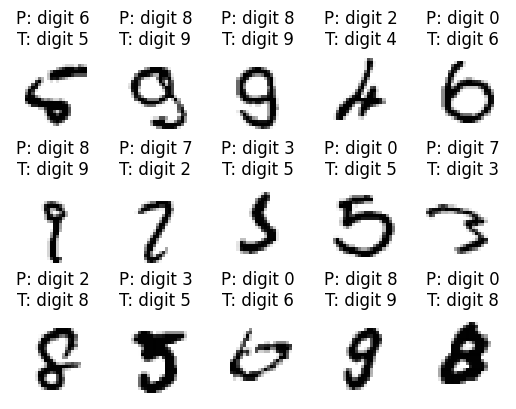

In [ ]:
show_failures(model=lightning_model_loaded, data_loader=test_dataloader, class_dict=class_dict)

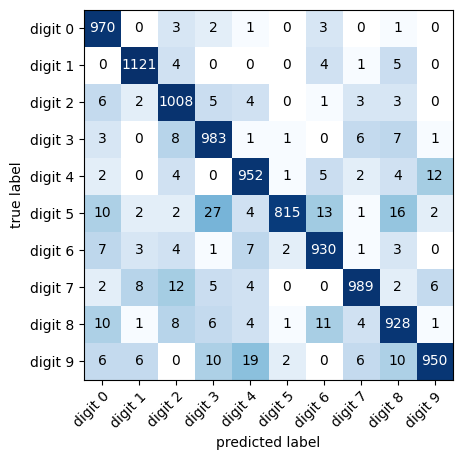

In [ ]:
# Plot confusion matrix
cmat = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=len(class_dict))

for x, y in dm.test_dataloader():

    with torch.inference_mode():
        pred = lightning_model_loaded(x)
    cmat(pred, y)

cmat_tensor = cmat.compute()
cmat = cmat_tensor.numpy()

fig, ax = plot_confusion_matrix(
    conf_mat=cmat,
    class_names=class_dict.values(),
    norm_colormap=matplotlib.colors.LogNorm()
)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show();